In [4]:
using DSP, NumericalIntegration, FFTW, Plots

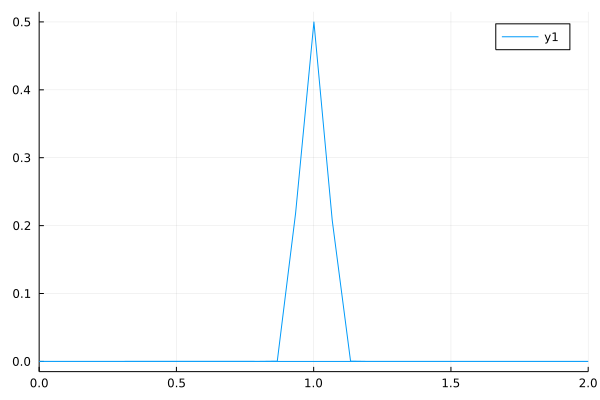

In [159]:
test_t = LinRange(0, 30pi, 100000)
dt = test_t[end]-test_t[end-1]
test_t = test_t[1:end-90]
test_y = cos.(test_t)

window = DSP.Windows.hamming(length(test_y))

test_fft = FFTW.fft(window .* test_y) / sum(window)
#test_fft = fftshift(test_fft)
freq = 2pi * fftfreq(length(test_y), 1/dt)
Plots.plot(freq, abs.(test_fft),xlim=(0,2))

In [160]:
indices =  -10 .< freq .< 10
norm = test_t[end]
integrate(freq[indices], abs.(test_fft)[indices]) * norm / (2pi)

1.8606118405948904

In [127]:
sum(window)

19999.0

In [117]:
@doc FFTW.fftshift

```
fftshift(x, [dim])
```

Circular-shift along the given dimension of a periodic signal `x` centered at index `1` so it becomes centered at index `N÷2+1`, where `N` is the size of that dimension.

This can be undone with [`ifftshift`](@ref). For even `N` this is equivalent to swapping the first and second halves, so `fftshift` and [`ifftshift`](@ref) are the same.

If `dim` is not given then the signal is shifted along each dimension.
